In [1]:
#Comparative Statics for the duopoly price discrimination model with loyalty and costs: Single stage Additive Loyalty case

#Core scientific modules
import numpy as np
from scipy.stats import uniform, norm
def perc_75(x): return np.percentile(x,75) #Percentile calculations
def perc_25(x): return np.percentile(x,25)

#Pandas, fileIO
import os, glob
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

#Plotting, display
from IPython.display import display, Markdown
from matplotlib import pyplot as plt, rcParams
from cycler import cycler
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set(style = "white", context="paper")
notebook_default_rcparams = { #Set default RC parameters
    "axes.labelsize": 30,
    "legend.fontsize":24,
    "xtick.labelsize":28,
    "ytick.labelsize":28,
    "axes.grid":True,
    "legend.framealpha":0.5,
    "lines.linewidth":5,
    "legend.loc":'upper left'}
rcParams.update(notebook_default_rcparams)
pltsettings ={'linestyle':'-','marker':'.','alpha':0.5}

In [2]:
#case 1: ta > 1/2
ta = 3

#case 2: ta < 1/2
# ta = .25


def get_optimal_prices(ta):
    #keep cb fixed
    cb = 0
    ca_arr = np.linspace(cb,3*ta+6,100) #ensure ca >= cb
    ca_m_cb_arr = ca_arr - cb
    paa_opt = np.zeros(ca_arr.size)
    pba_opt = np.zeros(ca_arr.size)
    for i,ca in enumerate(ca_arr):
        camcb = ca - cb
        if  3*ta-1 <= camcb and camcb <= 3*ta + 2:
            paa_opt[i] = (2*ta + 2*ca + cb)/3
            pba_opt[i] = (ta + ca + 2*cb)/3
        elif ta <= camcb and camcb <= 3*ta - 1:
            paa_opt[i] = ca
            pba_opt[i] = ca-ta
        elif camcb <= ta:
            paa_opt[i] = cb + ta
            pba_opt[i] = cb
        else:
            paa_opt[i] = ca
            pba_opt[i] = ca-ta-1
    return paa_opt,pba_opt,ca_m_cb_arr
paa_opt,pba_opt,ca_m_cb_arr = get_optimal_prices(ta)

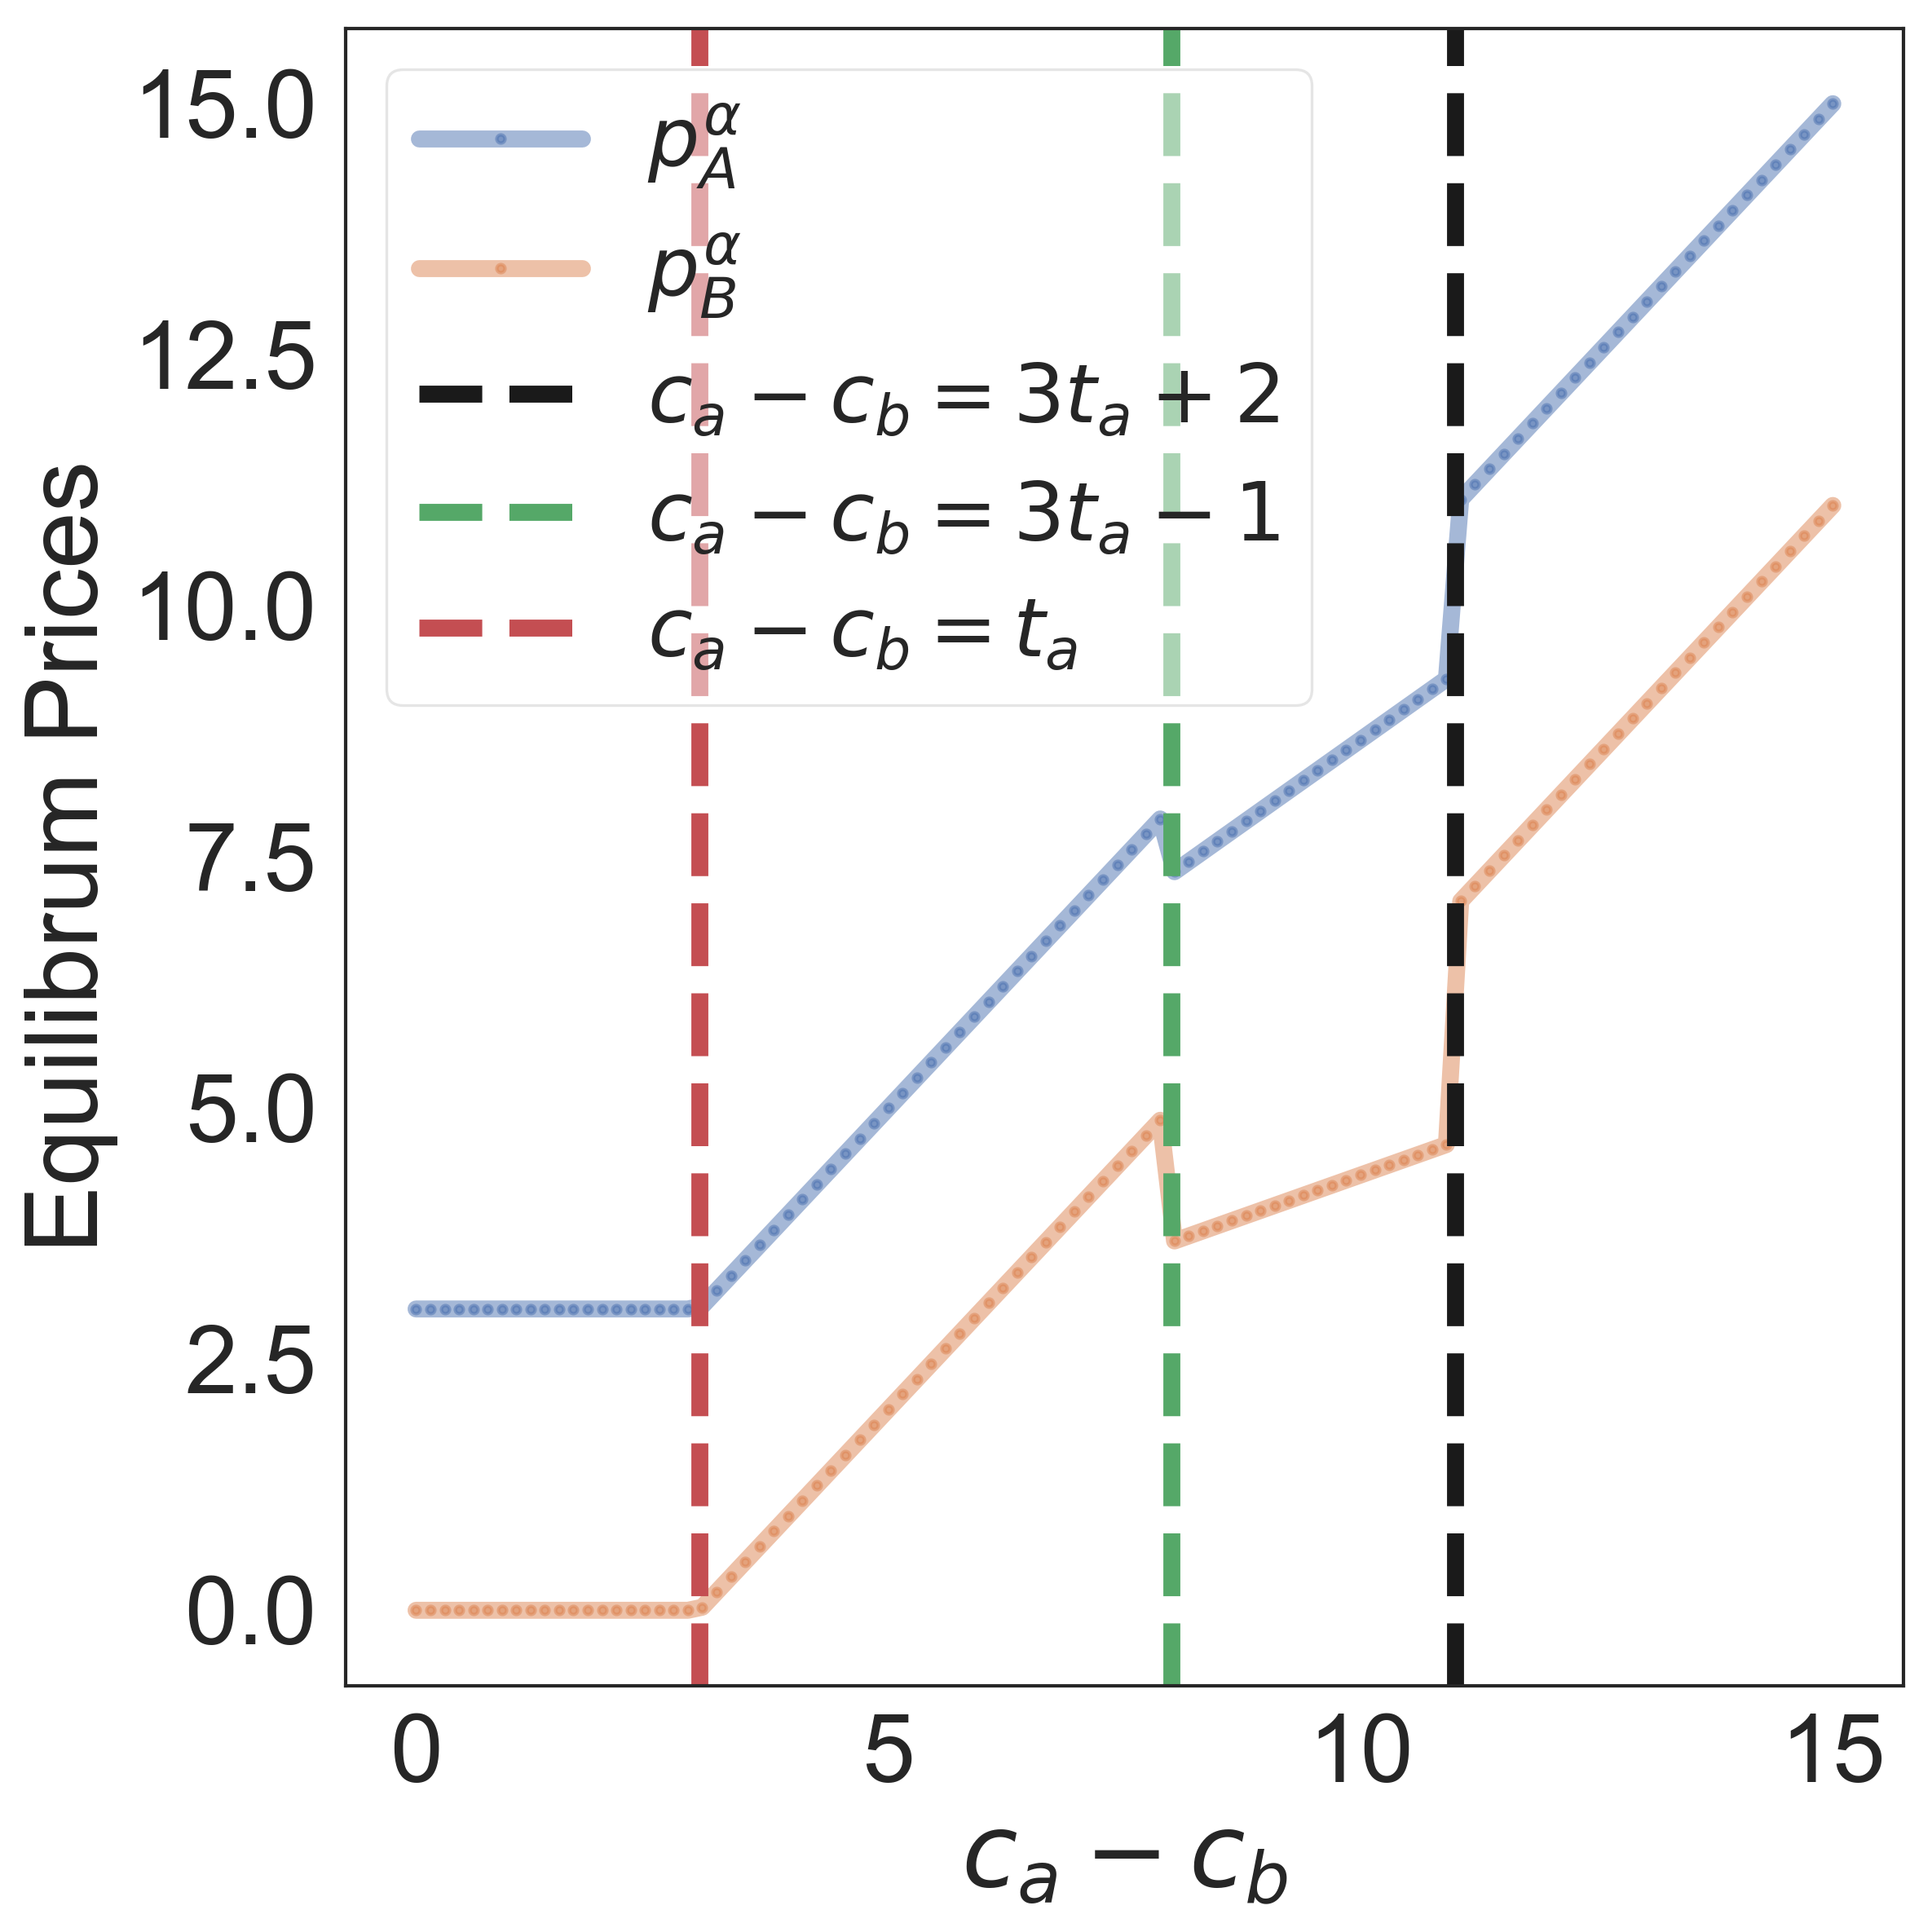

In [3]:
#plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
ax.plot(ca_m_cb_arr, paa_opt,**pltsettings,label=r'$p_{A}^{\alpha}$')
ax.plot(ca_m_cb_arr, pba_opt,**pltsettings,label=r'$p_{B}^{\alpha}$')
ax.axvline(x=3*ta+2,color='k', linestyle='--',label=r'$c_a - c_b = 3t_a+2$')
if ta>= 1/2:
    ax.axvline(x=3*ta-1,color='g', linestyle='--',label=r'$c_a - c_b = 3t_a-1$')
ax.axvline(x=ta,color='r', linestyle='--',label=r'$c_a - c_b = t_a$')
ax.set(xlabel=r'$c_a - c_b$', ylabel='Equilibrum Prices')
ax.legend(loc="best")
ax.grid()
plt.tight_layout()
fig.savefig('al_single_stage_paa_pba_ta'+str(ta).replace('.','p')+'.png')
plt.show()

In [4]:
# tb = 2
# pbb_opt = np.zeros(ca_arr.size)
# pab_opt = np.zeros(ca_arr.size)
# for i,ca in enumerate(ca_arr):
#     if ca - cb <= tb:
#         pbb_opt[i] = (2*tb + ca + 2*cb)/3
#         pab_opt[i] = (tb + cb + 2*ca)/3
#     else:
#         pbb_opt[i] = ca
#         pab_opt[i] = ca

### #plot
# fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
# ax.plot(ca_m_cb_arr, pbb_opt,**pltsettings,label=r'$p_{B}^{\beta}$')
# ax.plot(ca_m_cb_arr, pab_opt,**pltsettings,label=r'$p_{A}^{\beta}$')
# ax.axvline(x=tb,color='k', linestyle='--',label=r'$c_a - c_b = t_b$')
# ax.set(xlabel=r'$c_a - c_b$', ylabel='Equilibrum Prices')
# ax.legend(loc="best")
# ax.grid()
# plt.tight_layout()
# fig.savefig("al_single_stage_pbb_pab.png")
# plt.show()